In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'
               ])
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [5]:
simple_text = 'This isn\'t a real text, this is an example text... Notice this contains punctuation!!'

In [6]:
tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-z0-9\']+')
tokenized_document = tokenizer.tokenize(simple_text)
print(tokenized_document)

['This', "isn't", 'a', 'real', 'text', 'this', 'is', 'an', 'example', 'text', 'Notice', 'this', 'contains', 'punctuation']


In [7]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
cleaned_tokens = []
for word in tokenized_document:
    word = word.lower()
    if word not in stop_words:
        cleaned_tokens.append(word)
        print(cleaned_tokens)

['real']
['real', 'text']
['real', 'text', 'example']
['real', 'text', 'example', 'text']
['real', 'text', 'example', 'text', 'notice']
['real', 'text', 'example', 'text', 'notice', 'contains']
['real', 'text', 'example', 'text', 'notice', 'contains', 'punctuation']


In [10]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stemmer = nltk.stem.PorterStemmer()

words = ['cacti','sings', 'hopped','rocks','better','easily']
pos=['n','v','v','n','a','r']
lemmatized_words = [lemmatizer.lemmatize(words[i], pos=pos[i]) for i in range(6)]
stemmed_words = [stemmer.stem(word) for word in words]

print("Lemmatized words: ", lemmatized_words)
print("Stemmed words: ", stemmed_words)

Lemmatized words:  ['cactus', 'sing', 'hop', 'rock', 'good', 'easily']
Stemmed words:  ['cacti', 'sing', 'hop', 'rock', 'better', 'easili']


In [11]:
stemmed_text= [stemmer.stem(word) for word in cleaned_tokens]
print(stemmed_text)

['real', 'text', 'exampl', 'text', 'notic', 'contain', 'punctuat']


In [12]:
def preprocess_text(text):
 tokenized_document = nltk.tokenize.RegexpTokenizer('[a-zA-z0-9\']+').tokenize(text)
 cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
 stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
 return stemmed_text

In [13]:
print(preprocess_text('This product is great'))
print(preprocess_text('This product is not great'))

['product', 'great']
['product', 'great']


In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

print(sentiment.polarity_scores('This hotel is great'))
print(sentiment.polarity_scores('This hotel is not great'))

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


In [17]:
df['compound'] = [sentiment.polarity_scores(review)['compound'] for review in df['reviews.text']]
df['neg'] = [sentiment.polarity_scores(review)['neg'] for review in df['reviews.text']]
df['neu'] = [sentiment.polarity_scores(review)['neu'] for review in df['reviews.text']]
df['pos'] = [sentiment.polarity_scores(review)['pos'] for review in df['reviews.text']]
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,compound,neg,neu,pos
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...",-0.6908,0.186,0.814,0.000
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...",0.3612,0.000,0.828,0.172
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...",0.7650,0.000,0.577,0.423
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...",0.6124,0.000,0.688,0.312
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...",0.6249,0.000,0.687,0.313


In [18]:
df[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,28332.000000,28332.000000,28332.000000,28332.000000
mean,0.542494,0.032588,0.662152,0.305085
std,0.396777,0.077725,0.219644,0.228860
min,-0.989000,0.000000,0.000000,0.000000
25%,0.401900,0.000000,0.553000,0.149000
50%,0.658800,0.000000,0.696000,0.268000
75%,0.843900,0.033000,0.806000,0.419000
max,0.999200,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='compound', ylabel='Count'>

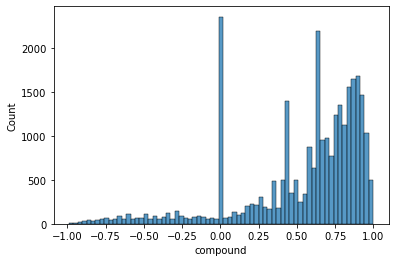

In [20]:
sns.histplot(df['compound'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

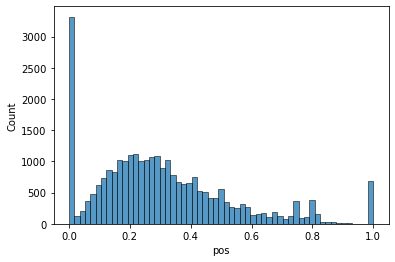

In [21]:
sns.histplot(df['pos'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

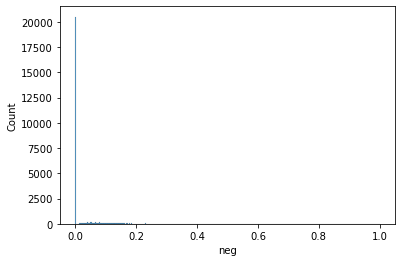

In [22]:
sns.histplot(df['neg'])

<AxesSubplot:xlabel='neu', ylabel='Count'>

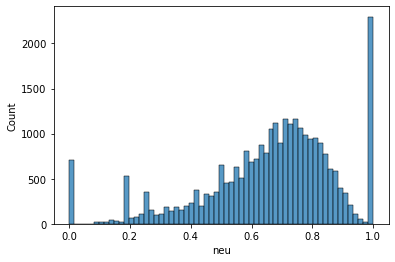

In [23]:
sns.histplot(df['neu'])

In [27]:
(df['pos']<=0).groupby(df['name']).sum()

name
All-New Fire 7 Tablet with Alexa, 7" Display, 8 GB - Marine Blue                                                                                           6
All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case                                                                           11
All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Pink Kid-Proof Case                                                                           17
All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers                                                               61
All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Marine Blue - with Special Offers                                                               17
                                                                                                                                                          ..
Kindle PowerFast International Charging Kit (for acce

In [28]:
(df['neg']<=0).groupby(df['name']).sum()

name
All-New Fire 7 Tablet with Alexa, 7" Display, 8 GB - Marine Blue                                                                                           60
All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Blue Kid-Proof Case                                                                           150
All-New Fire HD 8 Kids Edition Tablet, 8 HD Display, 32 GB, Pink Kid-Proof Case                                                                           207
All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Marine Blue - with Special Offers                                                               609
All-New Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Marine Blue - with Special Offers                                                                95
                                                                                                                                                         ... 
Kindle PowerFast International Charging Kit (fo

In [29]:
percent_negative = pd.DataFrame((df['compound']<=0).groupby(df['name']).sum()
                               /df['name'].groupby(df['name']).count()*100,
                               columns=['% negative reviews']).sort_values(by='% negative reviews')
percent_negative

,% negative reviews
name,
AmazonBasics Double-Door Folding Metal Dog Crate - Medium (36x23x25 Inches),0.0
Kindle PowerFast International Charging Kit (for accelerated charging in over 200 countries),0.0
Echo Spot Pair Kit (Black),0.0
Echo Dot (Previous generation),0.0
Cat Litter Box Covered Tray Kitten Extra Large Enclosed Hooded Hidden Toilet,0.0
...,...
AmazonBasics 16-Gauge Speaker Wire - 100 Feet,40.0
Amazon Echo ‚Äì White,50.0
Certified Refurbished Amazon Fire TV with Alexa Voice Remote,60.0


<AxesSubplot:xlabel='% negative reviews', ylabel='name'>

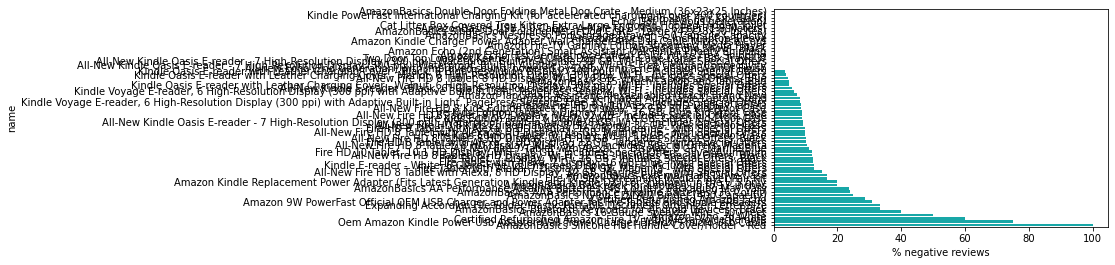

In [30]:
sns.barplot(data=percent_negative, x='% negative reviews', y=percent_negative.index, color='c')

In [36]:
df['processed_review'] = df['reviews.text'].apply(preprocess_text)

reviews_positive_subset = df.loc[(df['name']=='Certified Refurbished Amazon Fire TV with Alexa Voice Remote')
                                     & (df['compound']>0),:]
reviews_negative_subset = df.loc[(df['name']=='Certified Refurbished Amazon Fire TV with Alexa Voice Remote')
                                     & (df['compound']<=0),:]
reviews_positive_subset.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,compound,neg,neu,pos,processed_review
25866,AVzvXXwEvKc47QAVfRhx,2017-06-28T15:41:40Z,2019-02-25T02:03:33Z,Certified Refurbished Amazon Fire TV with Alex...,B00UH4D8G2,Amazon,"Amazon SMP,Categories,Streaming Media Players,...",Electronics,https://www.upccodesearch.com/images/barcode/0...,certifiedrefurbishedamazonfiretvwithalexavoice...,...,https://www.amazon.com/Certified-Refurbished-A...,"Love it, had the stick and it was kinda slow n...",Great,Michael S.,https://www.barcodable.com/upc/848719063264,0.0129,0.078,0.877,0.045,"[love, stick, kinda, slow, navig, one, much, f..."
25867,AVzvXXwEvKc47QAVfRhx,2017-06-28T15:41:40Z,2019-02-25T02:03:33Z,Certified Refurbished Amazon Fire TV with Alex...,B00UH4D8G2,Amazon,"Amazon SMP,Categories,Streaming Media Players,...",Electronics,https://www.upccodesearch.com/images/barcode/0...,certifiedrefurbishedamazonfiretvwithalexavoice...,...,https://www.amazon.com/Certified-Refurbished-A...,"This box is wonderful, meets my expectations p...",Happy with my Amazon fire tv,veava,https://www.barcodable.com/upc/848719063264,0.7783,0.000,0.884,0.116,"[box, wonder, meet, expect, plu, gave, cabl, t..."


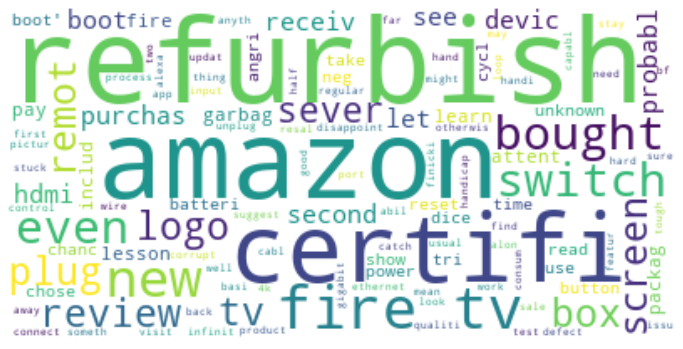

In [38]:
neg_tokens = [word for review in reviews_negative_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
     ' '.join(neg_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

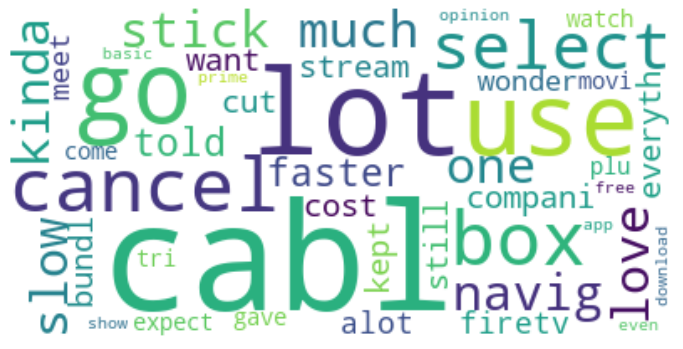

In [39]:
pos_tokens = [word for review in reviews_positive_subset['processed_review'] for word in review]

wordcloud = WordCloud(background_color='white').generate_from_text(
     ' '.join(pos_tokens))

plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()